# Paper results accuracy

#### Juan Camilo Henao Londono - 20.01.2020
#### AG Guhr - Universität Duisburg-Essen

With this notebook I want to test the accuracy of my results compared with the original results of the section 2 and 3 of the [paper](https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf).

In [1]:
# Modules

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys

sys.path.insert(1, '../../taq_algorithms')

import taq_data_analysis_responses_physical
import taq_data_tools_responses_physical

## TAQ data comparison

### TAQ trade signs data comparison

In [2]:
def taq_trade_sign_data_comparison(ticker, date):
    """Compares trade sign values.
    
    Compares the results of the trade signs from the TAQ data obtained by the
    `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me. The trade signs are computed using Eq. 1 and 2 of the paper.
    As the trades signs are not directly given by the TAQ data, they must be
    infered by the trades prices.
    
    :param ticker: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """
    
    date_sep = date.split('-')
    year = date_sep[0]
    month = date_sep[1]
    day = date_sep[2]
    
    # Load data
    # Trade time scale
    time_t, ask_t, identified_trades = taq_data_analysis_responses_physical \
                                           .taq_trade_signs_trade_data(ticker,
                                                                       date)
                                       
    
    condition = (time_t >= 34801) * (time_t <= 57000)
    
    d_trade_sign_trade_scale = {'Date': f'{year}-{month}-{day}',
                                'Time': time_t[condition],
                                'Price': ask_t[condition],
                                'Trade': identified_trades[condition]}
    trade_signs_trade_scale_juan = pd.DataFrame(data=d_trade_sign_trade_scale)

    trade_signs_trade_scale_paper = pd.read_csv(f'../data/trade_signs_trade'
                                                + f'_scale_{ticker}.txt',
                                                sep='\s+', header=None,
                                                engine='python')
    trade_signs_trade_scale_paper.columns = ['Date', 'Time', 'Price', 'Trade']
    
    assert len(trade_signs_trade_scale_paper) \
        == len(trade_signs_trade_scale_juan)
    
    # Physical time scale
    (_, _, 
     trade_signs_physical_scale_juan) = pickle.load(open(f'../../../taq_data/'
                                            + f'responses_physical_data_{year}'
                                            + f'/taq_trade_signs_physical_data/'
                                            + f'taq_trade_signs_physical_data'
                                            + f'_{year}{month}{day}_{ticker}'
                                            + f'.pickle','rb'))
        
    trade_signs_physical_scale_paper = np.loadtxt(f'../data/trade_signs_physical'
                                                + f'_scale_{ticker}.txt',
                                                usecols=3)
    
    assert len(trade_signs_physical_scale_paper) \
        == len(trade_signs_physical_scale_juan)

    # Comparison
    t_s_trade_scale_date_comp = np.sum(trade_signs_trade_scale_paper['Date']
                                       == trade_signs_trade_scale_juan['Date']) \
                                / len(trade_signs_trade_scale_paper['Date'])
    t_s_trade_scale_time_comp = np.sum(trade_signs_trade_scale_paper['Time']
                                       == trade_signs_trade_scale_juan['Time']) \
                                / len(trade_signs_trade_scale_paper['Time'])
    t_s_trade_scale_price_comp = np.sum(trade_signs_trade_scale_paper['Price']
                                        == trade_signs_trade_scale_juan['Price']) \
                                 / len(trade_signs_trade_scale_paper['Price'])
    t_s_trade_scale_trade_comp = np.sum(trade_signs_trade_scale_paper['Trade']
                                        == trade_signs_trade_scale_juan['Trade']) \
                                 / len(trade_signs_trade_scale_paper['Trade'])
    t_s_physical_scale_trade_comp = np.sum(trade_signs_physical_scale_paper 
                                         == trade_signs_physical_scale_juan) \
                                  / len(trade_signs_physical_scale_paper)

    print(f'Trade signs results - {ticker}')
    print('==========================')
    print()
    print('Comparison in the trade time scale')
    print('----------------------------------')
    print(f'The similarity in date values is '
          + f'{t_s_trade_scale_date_comp * 100:.2f}%')
    print(f'The similarity in time values is '
          + f'{t_s_trade_scale_time_comp * 100:.2f}%')
    print(f'The similarity in price values is '
          + f'{t_s_trade_scale_price_comp * 100:.2f}%')
    print(f'The similarity in trade sign values is '
          + f'{t_s_trade_scale_trade_comp * 100:.2f}%')
    print()    
    print('Comparison in the physical time scale')
    print('-------------------------------------')
    print(f'The similarity in trade sign values is '
          + f'{t_s_physical_scale_trade_comp * 100:.2f}%')
    print()
    
    return None

### TAQ midpoint price data comparison

In [3]:
def taq_midpoint_data_comparison(ticker, date):
    """Compares trade sign values.
    
    Compare the results of the midpoint price from the TAQ data obtained by the
    `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me. 
    
    :param ticker: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """''    
        
    date_sep = date.split('-')

    year = date_sep[0]
    month = date_sep[1]
    day = date_sep[2]
    
    # Load data
    # Trade time scale
    time_q, midpoint = taq_data_analysis_responses_physical \
                           .taq_midpoint_trade_data(ticker, date)

    condition = (time_q >= 34800) * (time_q <= 56999)

    d_midpoint_trade_scale = {'Date': f'{year}-{month}-{day}',
                              'Time': time_q[condition],
                              'Midpoint': midpoint[condition]}
    midpoint_trade_scale_juan = pd.DataFrame(data=d_midpoint_trade_scale)

    midpoint_trade_scale_paper = pd.read_csv(f'../data/midpoint_trade_scale'
                                             + f'_{ticker}.txt', sep='\s+',
                                             header=None, engine='python',
                                             usecols=(0,1,4))
    midpoint_trade_scale_paper.columns = ['Date', 'Time', 'Midpoint']

    assert len(midpoint_trade_scale_paper) == len(midpoint_trade_scale_juan)

    # Physical time scale
    midpoint_physical_scale_juan = pickle.load(open(f'../../../taq_data/responses'
                                        + f'_physical_data_{year}/taq_midpoint'
                                        + f'_physical_data/taq_midpoint_physical'
                                        + f'_data_midpoint_{year}{month}{day}'
                                        + f'_{ticker}.pickle','rb'))

    midpoint_physical_scale_paper = np.loadtxt(f'../data/midpoint_physical_scale'
                                             + f'_{ticker}.txt', usecols=2)
    midpoint_physical_scale_paper = midpoint_physical_scale_paper / 10000
    
    assert len(midpoint_physical_scale_paper) == len(midpoint_physical_scale_juan)

    # Comparison
    mp_trade_scale_date_comp = np.sum(midpoint_trade_scale_paper['Date']
                                      == midpoint_trade_scale_juan['Date']) \
                               / len(midpoint_trade_scale_paper['Date'])
    mp_trade_scale_time_comp = np.sum(midpoint_trade_scale_paper['Time']
                                      == midpoint_trade_scale_juan['Time']) \
                               / len(midpoint_trade_scale_paper['Time'])
    mp_trade_scale_midpoint_comp = np.sum(midpoint_trade_scale_paper['Midpoint']
                                          == midpoint_trade_scale_juan['Midpoint']) \
                                   / len(midpoint_trade_scale_paper['Midpoint'])
    mp_physical_scale_midpoint_comp = np.sum(midpoint_physical_scale_paper
                                           == midpoint_physical_scale_juan) \
                                    / len(midpoint_physical_scale_paper)
    
    print(f'Midpoint price results - {ticker}')
    print('=============================')
    print()
    print('Comparison in the trade time scale')
    print('----------------------------------')
    print(f'The similarity in date values is '
          + f'{mp_trade_scale_date_comp * 100:.2f}%')
    print(f'The similarity in time values is '
          + f'{mp_trade_scale_time_comp * 100:.2f}%')
    print(f'The similarity in midpoint values is '
          + f'{mp_trade_scale_midpoint_comp * 100:.2f}%')
    print()
    print('Comparison in the physical time scale')
    print('-----------------------------------')
    print('The similarity in midpoint values is '
          + f'{mp_physical_scale_midpoint_comp * 100:.2f}%')
    print()
    
    return None

### TAQ self-response data comparison

In [4]:
def taq_self_response_data_comparison(ticker, year):
    """Compares self-response function values.
    
    Compares the results of the self-response function from the TAQ data
    obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.
    
    :param ticker: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """
        
    # Load    
    self_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_self'
                    + f'_response_year_responses_physical_data/taq_self_response'
                    + f'_year_responses_physical_data_{year}_{ticker}.pickle',
                    'rb'))

    self_paper = np.loadtxt(f'../data/{ticker}_{ticker}_{year}_RDC_L=1000.txt',
                            usecols=1)
    self_paper = self_paper[1:]

    assert len(self_paper) == len(self_juan)

    # Comparison
    self_paper_arr = np.array([float('{:.4f}'.format(i)) for i in self_paper])
    self_juan_arr = np.array([float('{:.4f}'.format(i)) for i in self_juan])
    self_comp = np.sum(self_paper_arr == self_juan_arr) / len(self_paper_arr)
    
    print(f'Self-response results - {ticker}')
    print('============================')
    print()
    print('Comparison in the physical time scale')
    print('-----------------------------------')
    print('The similarity in the self-response values is '
          + f'{self_comp * 100:.2f}%')
    print()
    
    return None

### TAQ cross-response data comparison

In [5]:
def taq_cross_response_data_comparison(ticker_i, ticker_j, year):
    """Compares cross-response function values.

    Compares the results of the cross-response function from the TAQ data
    obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.

    :param ticker_i: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param ticker_j: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """

    # Load
    cross_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_cross'
                    + f'_response_year_responses_physical_data/taq_cross_response'
                    + f'_year_responses_physical_data_{year}_{ticker_i}i'
                    + f'_{ticker_j}j.pickle','rb'))

    cross_paper = np.loadtxt(f'../data/{ticker_i}_{ticker_j}_{year}_RDC_L=1000'
                            + f'.txt', usecols=1)
    cross_paper = cross_paper[1:]

    assert len(cross_paper) == len(cross_juan)

    # Comparison
    cross_paper_arr = np.array([float('{:.4f}'.format(i)) for i in cross_paper])
    cross_juan_arr = np.array([float('{:.4f}'.format(i)) for i in cross_juan])
    cross_comp = np.sum(cross_paper_arr == cross_juan_arr) / len(cross_paper_arr)

    print(f'Cross-response results - {ticker_i}-{ticker_j}')
    print('==================================')
    print()
    print('Comparison in the physical time scale')
    print('-----------------------------------')
    print('The similarity in the cross-response values is '
          + f'{cross_comp * 100:.2f}%')
    print()

    return None

### TAQ trade sign self-correlator data comparison

In [6]:
def taq_self_correlator_data_comparison(ticker, year):
    """Compares trade sign self-correlator function values.

    Compares the results of the trade signs self-correlator function from the
    TAQ data obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.

    :param ticker: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """

    # Load
    self_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_trade'
                    + f'_sign_self_correlator_year_responses_physical_data/taq'
                    + f'_trade_sign_self_correlator_year_responses_physical_data'
                    + f'_{year}_{ticker}.pickle', 'rb'))

    self_paper = np.loadtxt(f'../data/{ticker}_{ticker}_{year}_RDC_L=1000.txt',
                            usecols=2)
    self_paper = self_paper[1:]

    assert len(self_paper) == len(self_juan)

    # Comparison
    self_paper_arr = np.array([float('{:.3f}'.format(i)) for i in self_paper])
    self_juan_arr = np.array([float('{:.3f}'.format(i)) for i in self_juan])
    self_comp = np.sum(self_paper_arr == self_juan_arr) / len(self_paper_arr)

    print(f'Trade sign self-correlator results - {ticker}')
    print('=========================================')
    print()
    print('Comparison in the physical time scale')
    print('-----------------------------------')
    print('The similarity in the self-correlator values is '
          + f'{self_comp * 100:.2f}%')
    print()

    return None

### TAQ trade sign cross-correlator data comparison

In [7]:
def taq_cross_correlator_data_comparison(ticker_i, ticker_j, year):
    """Compares trade sign cross-correlator function values.

    Compares the results of the cross-response function from the TAQ data
    obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.

    :param ticker_i: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param ticker_j: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """

    # Load
    cross_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_trade'
                    + f'_sign_cross_correlator_year_responses_physical_data/taq'
                    + f'_trade_sign_cross_correlator_year_responses_physical_data'
                    + f'_{year}_{ticker_i}i_{ticker_j}j.pickle','rb'))

    cross_paper = np.loadtxt(f'../data/{ticker_i}_{ticker_j}_{year}_RDC_L=1000'
                            + f'.txt', usecols=2)
    cross_paper = cross_paper[1:]

    assert len(cross_paper) == len(cross_juan)

    # Comparison
    cross_paper_arr = np.array([float('{:.4f}'.format(i)) for i in cross_paper])
    cross_juan_arr = np.array([float('{:.4f}'.format(i)) for i in cross_juan])
    cross_comp = np.sum(cross_paper_arr == cross_juan_arr) / len(cross_paper_arr)

    print(f'Trade sign cross-correlator results - {ticker_i}-{ticker_j}')
    print('================================================')
    print()
    print('Comparison in the physical time scale')
    print('-----------------------------------')
    print('The similarity in the cross-response values is '
          + f'{cross_comp * 100:.2f}%')
    print()

    return None

## TAQ plot comparison

### TAQ self-response plot comparison

In [8]:
def taq_self_response_plot_comparison(ticker, year):
    """Compares self-response function plots.
    
    Compares the plots of the self-response function from the TAQ data 
    obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.
    
    :param ticker: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """
    
    # Load    
    self_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_self'
                    + f'_response_year_responses_physical_data/taq_self_response'
                    + f'_year_responses_physical_data_{year}_{ticker}.pickle',
                    'rb'))

    self_paper = np.loadtxt(f'../data/{ticker}_{ticker}_{year}_RDC_L=1000.txt',
                            usecols=1)
    self_paper = self_paper[1:]

    assert len(self_paper) == len(self_juan)
    
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    plt.semilogx(self_paper, linewidth=5, label=f'Paper - {ticker}')
    plt.semilogx(self_juan, linewidth=5, label=f'Juan - {ticker}')
    plt.legend(loc='best', fontsize=25)
    plt.title('Self-responses - article reproduction', fontsize=40)
    plt.xlabel(r'$\tau \, [s]$', fontsize=35)
    plt.ylabel(r'$R_{ii}(\tau)$', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlim(1,1000)
    # plt.ylim(13 * 10 ** -5, 16 * 10 ** -5)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.yaxis.offsetText.set_fontsize(25)
    plt.grid(True)
    plt.tight_layout()
    
    return None

### TAQ cross-response plot comparison

In [9]:
def taq_cross_response_plot_comparison(ticker_i, ticker_j, year):
    """Compares cross-response function plots.
    
    Compares the plots of the cross-response function from the TAQ data
    obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.
    
    :param ticker_i: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param ticker_j: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """
    
    # Load
    cross_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_cross'
                    + f'_response_year_responses_physical_data/taq_cross_response'
                    + f'_year_responses_physical_data_{year}_{ticker_i}i'
                    + f'_{ticker_j}j.pickle','rb'))

    cross_paper = np.loadtxt(f'../data/{ticker_i}_{ticker_j}_{year}_RDC_L=1000'
                            + f'.txt', usecols=1)
    cross_paper = cross_paper[1:]

    assert len(cross_paper) == len(cross_juan)

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    plt.semilogx(cross_paper, linewidth=5, label=f'Paper - {ticker_i}-{ticker_j}')
    plt.semilogx(cross_juan, linewidth=5, label=f'Juan - {ticker_i}-{ticker_j}')
    plt.legend(loc='best', fontsize=25)
    plt.title('Cross-responses - article reproduction', fontsize=40)
    plt.xlabel(r'$\tau \, [s]$', fontsize=35)
    plt.ylabel(r'$R_{ij}(\tau)$', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlim(1,1000)
    # plt.ylim(4 * 10 ** -5, 9 * 10 ** -5)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.yaxis.offsetText.set_fontsize(25)
    plt.grid(True)
    plt.tight_layout()
    
    return None

### TAQ trade sign self-correlator plot comparison

In [10]:
def taq_self_correlator_plot_comparison(ticker, year):
    """Compares trade sign self-correlator function plots.
    
    Compares the plots of the trade signs self-correlator function from the
    TAQ data obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.
    
    :param ticker: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """

    # Load
    self_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_trade'
                    + f'_sign_self_correlator_year_responses_physical_data/taq'
                    + f'_trade_sign_self_correlator_year_responses_physical_data'
                    + f'_{year}_{ticker}.pickle', 'rb'))
                    
    self_paper = np.loadtxt(f'../data/{ticker}_{ticker}_{year}_RDC_L=1000.txt',
                            usecols=2)
    self_paper = self_paper[1:]
    
    assert len(self_paper) == len(self_juan)

    fig = plt.figure(figsize=(16, 9))
    plt.loglog(self_paper, linewidth=5, label=f'Paper - {ticker}')
    plt.loglog(self_juan, linewidth=5, label=f'Juan - {ticker}')
    plt.legend(loc='best', fontsize=25)
    plt.title('Trade sign self-correlator - article reproduction', fontsize=40)
    plt.xlabel(r'$\tau \, [s]$', fontsize=35)
    plt.ylabel(r'$\Theta_{ii}(\tau)$', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlim(1,1000)
    plt.ylim(10 ** -6, 1)
    plt.grid(True)
    plt.tight_layout()
        
    return None

### TAQ trade sign cross-correlator plot comparison

In [11]:
def taq_cross_correlator_plot_comparison(ticker_i, ticker_j, year):
    """Compares trade sign cross-correlator function values.
    
    Compares the plots of the cross-response function from the TAQ data
    obtained by the `paper
    <https://link.springer.com/content/pdf/10.1140/epjb/e2016-60818-y.pdf>`
    and by me.
    
    :param ticker_i: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param ticker_j: string of the abbreviation of the stock to be analized
     (i.e. 'AAPL')
    :param date: string of the date to be analized (i.e '2008-07-07')
    :return: None -- The function analyze the data and does not return a
     value.
    """

    # Load    
    cross_juan = pickle.load(open(
                    f'../../../taq_data/responses_physical_data_{year}/taq_trade'
                    + f'_sign_cross_correlator_year_responses_physical_data/taq'
                    + f'_trade_sign_cross_correlator_year_responses_physical_data'
                    + f'_{year}_{ticker_i}i_{ticker_j}j.pickle','rb'))

    cross_paper = np.loadtxt(f'../data/{ticker_i}_{ticker_j}_{year}_RDC_L=1000'
                            + f'.txt', usecols=2)
    cross_paper = cross_paper[1:]
        
    assert len(cross_paper) == len(cross_juan)

    fig = plt.figure(figsize=(16, 9))
    plt.loglog(cross_paper, linewidth=5, label=f'Paper - {ticker_i}-{ticker_j}')
    plt.loglog(cross_juan, linewidth=5, label=f'Juan - {ticker_i}-{ticker_j}')
    plt.legend(loc='best', fontsize=25)
    plt.title('Trade sign cross-correlation - article reproduction', fontsize=40)
    plt.xlabel(r'$\tau \, [s]$', fontsize=35)
    plt.ylabel(r'$\Theta_{ij}(\tau)$', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlim(1,1000)
    plt.ylim(10 ** -6, 1)
    plt.grid(True)
    plt.tight_layout()
        
    return None

## Run accuracy analysis

+++++++++++++++++++++++++
Results Accuracy Analysis
+++++++++++++++++++++++++

Trade signs results - AAPL

Comparison in the trade time scale
----------------------------------
The similarity in date values is 100.00%
The similarity in time values is 100.00%
The similarity in price values is 100.00%
The similarity in trade sign values is 100.00%

Comparison in the physical time scale
-------------------------------------
The similarity in trade sign values is 100.00%

Midpoint price results - AAPL

Comparison in the trade time scale
----------------------------------
The similarity in date values is 100.00%
The similarity in time values is 100.00%
The similarity in midpoint values is 100.00%

Comparison in the physical time scale
-----------------------------------
The similarity in midpoint values is 100.00%

Self-response results - AAPL

Comparison in the physical time scale
-----------------------------------
The similarity in the self-response values is 100.00%

Trade sign self-cor

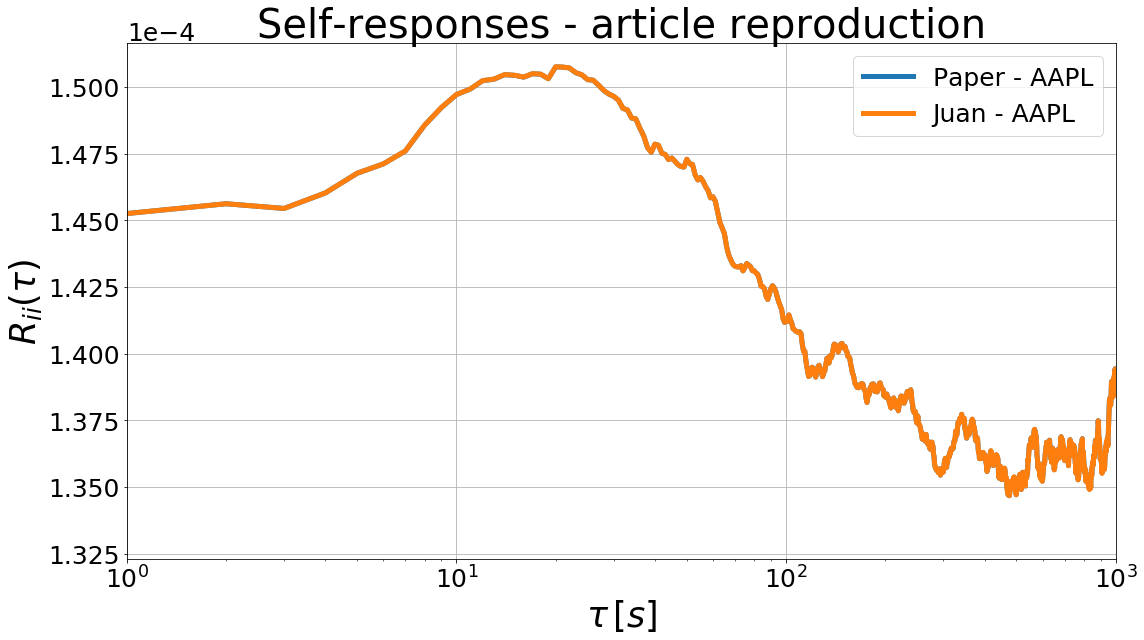

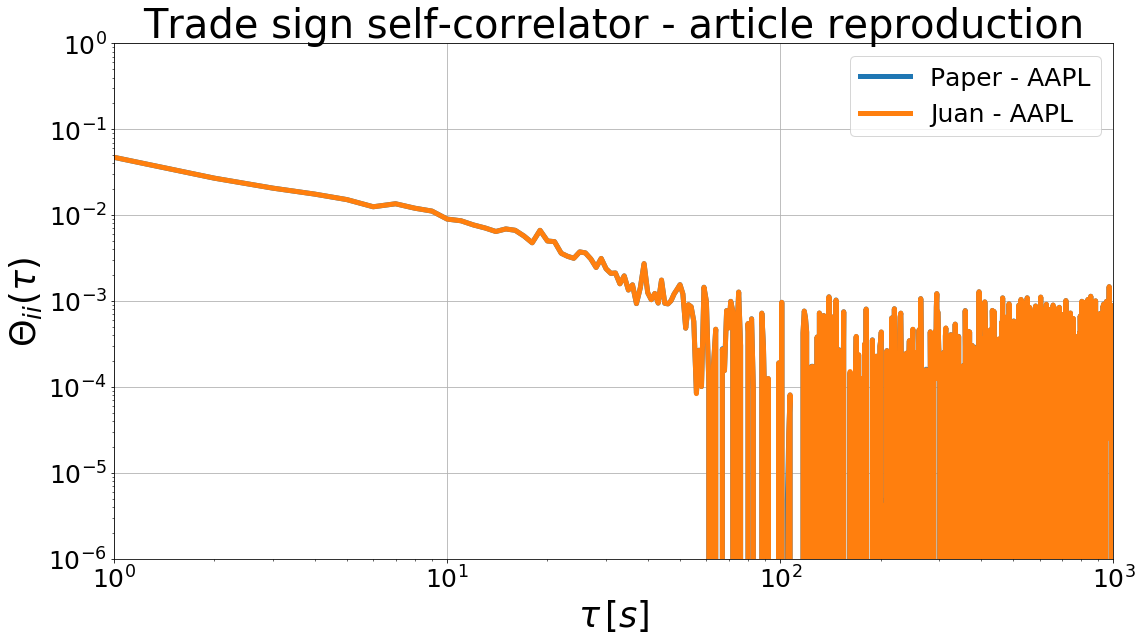

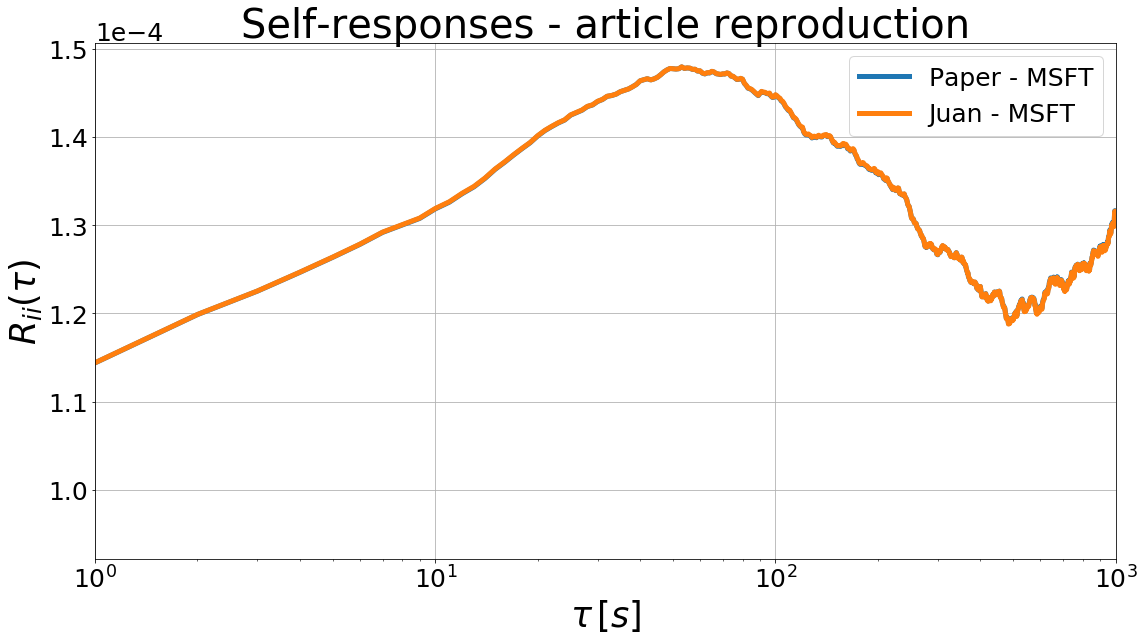

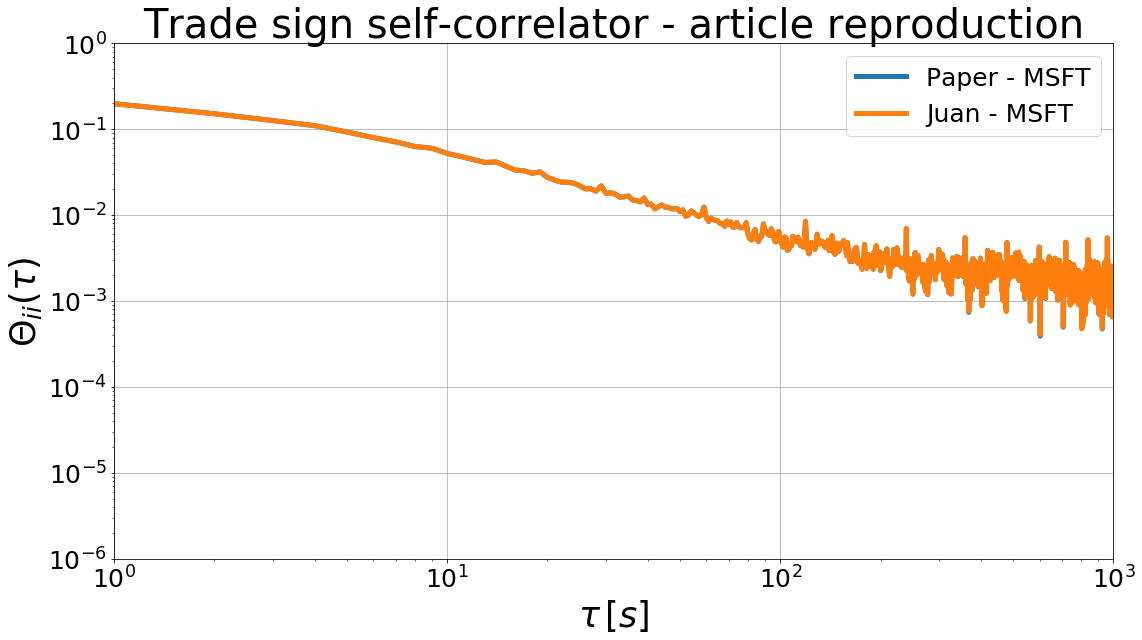

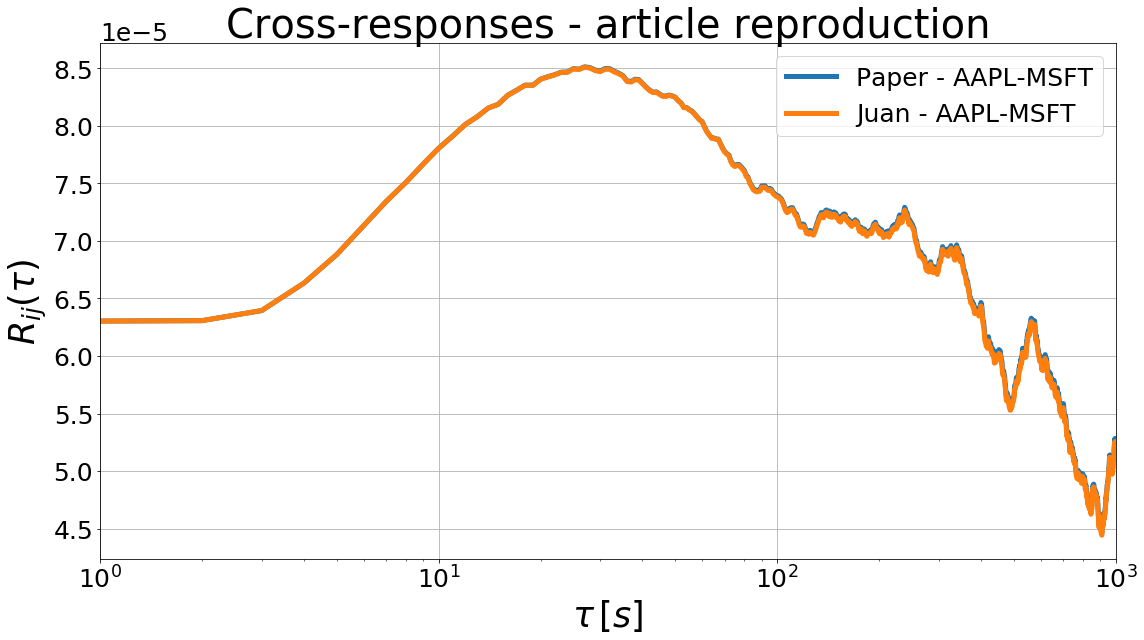

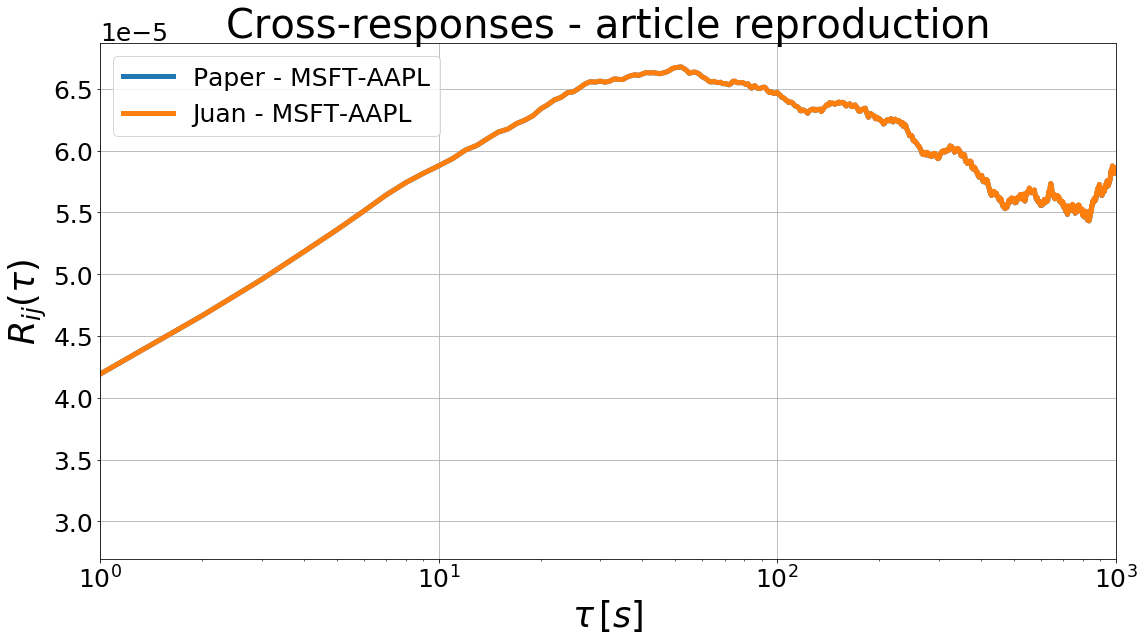

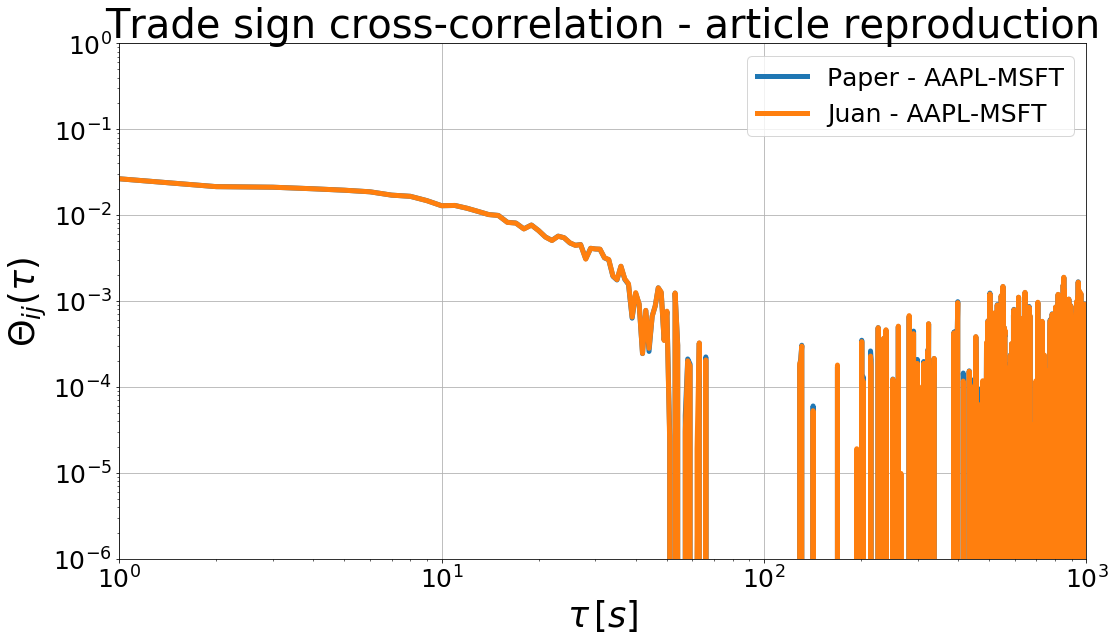

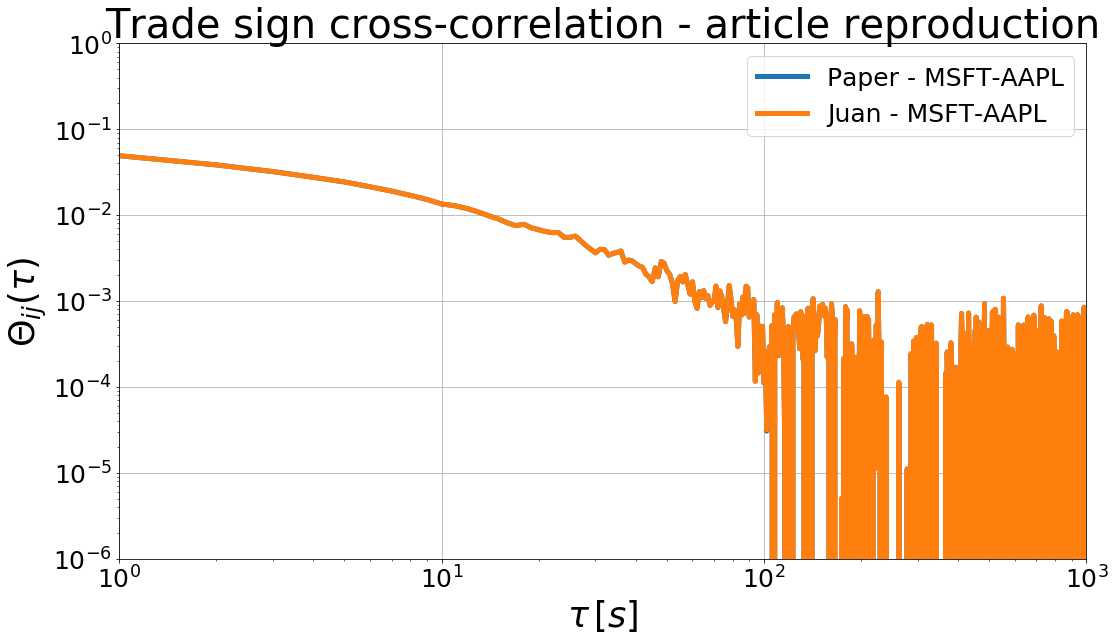

In [12]:
# Run the complete accuracy analysis

tickers = ['AAPL', 'MSFT']
year = '2008'
month = '01'
day = '02'
date = year + '-' + month + '-' + day

for ticker in tickers:
    
    print('+++++++++++++++++++++++++')
    print(f'Results Accuracy Analysis')
    print('+++++++++++++++++++++++++')
    print()
    taq_trade_sign_data_comparison(ticker, date)
    taq_midpoint_data_comparison(ticker, date)
    taq_self_response_data_comparison(ticker, year)
    taq_self_response_plot_comparison(ticker, year)
    taq_self_correlator_data_comparison(ticker, year)
    taq_self_correlator_plot_comparison(ticker, year)
    
taq_cross_response_data_comparison(tickers[0], tickers[1], year)
taq_cross_response_plot_comparison(tickers[0], tickers[1], year)
taq_cross_response_data_comparison(tickers[1], tickers[0], year)
taq_cross_response_plot_comparison(tickers[1], tickers[0], year)
taq_cross_correlator_data_comparison(tickers[0], tickers[1], year)
taq_cross_correlator_plot_comparison(tickers[0], tickers[1], year)
taq_cross_correlator_data_comparison(tickers[1], tickers[0], year)
taq_cross_correlator_plot_comparison(tickers[1], tickers[0], year)